# Simplifying Data With The Douglas-Peucker Algorithm

In [1]:
import os
import tarfile
import glob

import plio
import libpysat
import math
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams

import pandas as pd

from datasketch import MinHashLSH, WeightedMinHashGenerator, MinHash

In [2]:
files = glob.glob('*.sl2')
for f in files:
    tar = tarfile.open(f)
    # Extract the spc and the ctg files
    list(map(tar.extract, [m for m in tar.getmembers() if '.spc' in m.name]))

In [3]:
"# To get a dataframe of the data\n",
import os
files = glob.glob('*.spc')
d = {}
for f in files:
    s = libpysat.data.spectra.Spectra.from_file(f)
    ref1s = s.xs('REF1', level=1, axis=1)
    break

/home/cole/miniconda3/envs/pokemon/lib/python3.6/site-packages/libpysat-0.1.0-py3.6.egg/libpysat/data/io.py:21: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  geo_data = io_spectral_profiler.Spectral_Profiler(f)


In [4]:
ref1s.data

id,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
major,,,,,,,,,,,,,,,,,,,,,
512.6,0.0547,0.0482,0.0560,0.0303,0.0144,0.0036,0.0043,0.0032,0.0114,0.0480,...,0.0367,0.0638,0.1054,0.1025,0.0937,0.0678,0.0489,0.0453,0.0364,0.0296
518.4,0.0655,0.0585,0.0681,0.0365,0.0171,0.0041,0.0049,0.0043,0.0137,0.0579,...,0.0444,0.0775,0.1272,0.1244,0.1140,0.0822,0.0594,0.0544,0.0445,0.0360
524.7,0.0670,0.0597,0.0694,0.0372,0.0175,0.0044,0.0051,0.0044,0.0142,0.0591,...,0.0452,0.0791,0.1297,0.1267,0.1161,0.0838,0.0608,0.0556,0.0452,0.0366
530.4,0.0700,0.0625,0.0725,0.0390,0.0183,0.0044,0.0055,0.0042,0.0147,0.0619,...,0.0472,0.0826,0.1358,0.1324,0.1214,0.0877,0.0634,0.0582,0.0473,0.0383
536.5,0.0718,0.0641,0.0744,0.0399,0.0191,0.0047,0.0058,0.0048,0.0151,0.0632,...,0.0483,0.0850,0.1392,0.1365,0.1252,0.0906,0.0655,0.0598,0.0485,0.0393
542.8,0.0739,0.0663,0.0770,0.0412,0.0196,0.0049,0.0059,0.0050,0.0159,0.0653,...,0.0501,0.0880,0.1434,0.1407,0.1291,0.0933,0.0674,0.0616,0.0500,0.0405
548.7,0.0752,0.0672,0.0778,0.0419,0.0200,0.0050,0.0058,0.0051,0.0160,0.0663,...,0.0509,0.0893,0.1457,0.1429,0.1307,0.0947,0.0685,0.0623,0.0507,0.0410
554.5,0.0767,0.0683,0.0788,0.0426,0.0202,0.0052,0.0059,0.0052,0.0162,0.0678,...,0.0518,0.0909,0.1485,0.1453,0.1333,0.0964,0.0696,0.0634,0.0515,0.0416
560.5,0.0797,0.0712,0.0822,0.0443,0.0210,0.0053,0.0062,0.0054,0.0170,0.0705,...,0.0539,0.0948,0.1545,0.1515,0.1389,0.1006,0.0725,0.0661,0.0535,0.0434


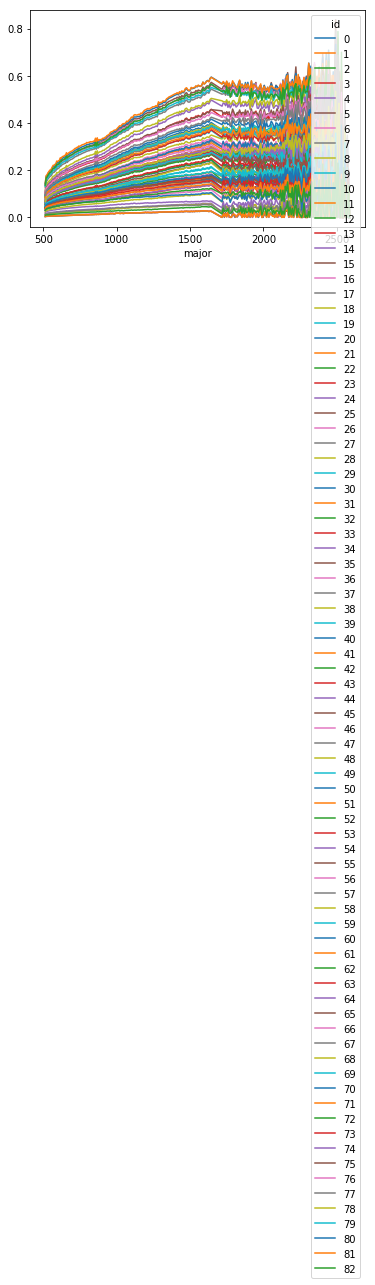

In [5]:
ref1s.data.plot()

In [6]:
def DouglasPeucker(df, index_list, epsilon=0.000000000000000000000):
    dmax = 0
    index = 0
    end = len(index_list) - 1
    
    for i in range(1, end - 1):
        d = distance( (index_list[i], df.loc[index_list[i]]), (index_list[0], df.loc[index_list[0]]), (index_list[end], df.loc[index_list[end]]) ) 
        if ( d > dmax ):
            index = i
            dmax = d
            
    if ( dmax > epsilon ):
        recResults1 = DouglasPeucker(df, index_list[0:index], epsilon)
        recResults2 = DouglasPeucker(df, index_list[index:end + 1], epsilon)
        ResultList = recResults1 + recResults2
    else:
        ResultList = [(index_list[0], df.loc[index_list[0]]), (index_list[end], df.loc[index_list[end]])]
        
    return ResultList

def convert(index_list):
    returnVal = pd.DataFrame( columns = ['0'] )
    returnVal.index.name = 'major'
    for pair in index_list:
        returnVal.loc[pair[0]] = [pair[1]]
    return returnVal
    
def distance(point, start, end):
    numerator = abs((end[1] - start[1]) * point[0] - (end[0] - start[0]) * point[1] + end[0]* start[1] - end[1]*start[0])
    denominator = math.sqrt( (end[1]-start[1])*(end[1]-start[1]) + (end[0] - start[0])*(end[0] - start[0]) )
    return numerator/denominator

def standard_size( size, original, epsilon = 0.0000 ):
    reduced = convert(DouglasPeucker( original , original.index, epsilon))
    difference = size - len(reduced)
    while difference < 0:
        epsilon += .0001
        reduced = convert(DouglasPeucker( original , original.index , epsilon))
        difference = size - len(reduced)
    if difference > 0:
        for x, y in original.iteritems():
            if difference == 0:
                break
            if x not in reduced.index:
                reduced.loc[x] = y
                difference -=1
    return reduced.sort_index(), epsilon # add values from original


In [7]:
indices_to_keep = DouglasPeucker(ref1s.data.iloc[:, 2], ref1s.data.index )
newline = convert(indices_to_keep)

Before Simplification:  269


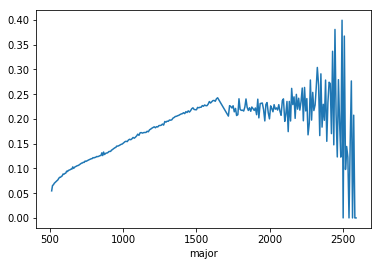

In [8]:
print('Before Simplification: ', len(ref1s.data.index))
ref1s.data.iloc[:, 0].plot()

After Simplification:  213


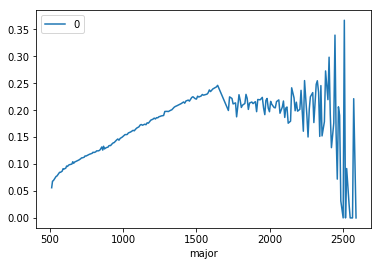

In [9]:
print('After Simplification: ', len(newline.index))
newline.plot()

# Average Simplification of Observations For Arbitrary Image

In [10]:
original_plots = []
reduced_plots = []

In [11]:
# original_plots = []
# reduced_plots = []
# for i in range(0,83):
# #     indices_to_keep = DouglasPeucker(ref1s.data.iloc[:, i], ref1s.data.index )
# #     newline = convert(indices_to_keep)
#     original_plots.append(ref1s.data.iloc[:, i])
#     newline = standard_size( 220, original_plots[i])[0]
#     reduced_plots.append(newline)

In [12]:
# i = 5
# print(reduced_plots[i])

In [13]:
# average_reduction = 0
# for df in reduced_plots:
#     print(len(df)) 
#     average_reduction += len(df)
# print('From 269 to', average_reduction/len(reduced_plots))

In [14]:
# # compare specific observations
# i = 37
# original_plots[i].plot()
# reduced_plots[i].plot()
# print((reduced_plots[i]))
# print((reduced_plots[i].sort_index()))

# Hash Comparisons

In [15]:
# create a hash
def compute_minhash(col,**kwargs):
    if type(col) is not np.ndarray:
        col = np.array(col.values.flatten().tolist())
    mg = WeightedMinHashGenerator(len(col))
    v = col
    m = mg.minhash(v)
    return m

# Checking raw data 
def jaccard_similarity( array1, array2 ):
    union = len( np.union1d(array1, array2) )
    intersect = len( np.intersect1d(array1, array2) )
    jaccard_index = intersect/union
    jaccard_distance = 1 - jaccard_index  # just in case
    return jaccard_index

def jaccard_similarity_hash( hash1, hash2 ):
    intersection = 0
    for this, that in zip(hash1.hashvalues, hash2.hashvalues):
        print(this)
        if np.array_equal(this, that):
            intersection += 1
    return float(intersection) / float(len(hash1))


In [32]:
from pathlib import Path
import time

size = 269
sizes = []
epsilon = 0
resulting_arr = []
originals_plots = []
reducedr_plots = []
persistent_plots = []
while size >= 40:
    start = time.time()
    print( 'Entering size ({}) with epsilon ({})'.format(size, epsilon), end = ' : ')
    if Path('data/reduced_by_{}.npy'.format(269 - size)).is_file():
        print('npy file exists in data directory')
        size -= 1
        continue
    sizes.append(269 - size)
    reducedr_plots = []
    for i in range(0, 83):
        originals_plots.append(ref1s.data.iloc[:, i])
        newline, epsilon = standard_size( size, ref1s.data.iloc[:, i], epsilon)
        reducedr_plots.append( np.array(newline.values.flatten().tolist()) )
    persistent_plots.append( np.array(reducedr_plots) )
    size -= 1
    print(time.time() - start)

Entering size (269) with epsilon (0) : npy file exists in data directory
Entering size (268) with epsilon (0) : npy file exists in data directory
Entering size (267) with epsilon (0) : npy file exists in data directory
Entering size (266) with epsilon (0) : npy file exists in data directory
Entering size (265) with epsilon (0) : npy file exists in data directory
Entering size (264) with epsilon (0) : npy file exists in data directory
Entering size (263) with epsilon (0) : npy file exists in data directory
Entering size (262) with epsilon (0) : npy file exists in data directory
Entering size (261) with epsilon (0) : npy file exists in data directory
Entering size (260) with epsilon (0) : npy file exists in data directory
Entering size (259) with epsilon (0) : npy file exists in data directory
Entering size (258) with epsilon (0) : npy file exists in data directory
Entering size (257) with epsilon (0) : npy file exists in data directory
Entering size (256) with epsilon (0) : npy file exi

Entering size (59) with epsilon (0) : 393.88857436180115
Entering size (58) with epsilon (0.03399999999999995) : 68.42157483100891
Entering size (57) with epsilon (0.03409999999999995) : 92.57228684425354
Entering size (56) with epsilon (0.03770000000000005) : 65.26715445518494
Entering size (55) with epsilon (0.03770000000000005) : 85.74928975105286
Entering size (54) with epsilon (0.04050000000000013) : 75.09916877746582
Entering size (53) with epsilon (0.042000000000000176) : 63.67331790924072
Entering size (52) with epsilon (0.042000000000000176) : 63.227243423461914
Entering size (51) with epsilon (0.042000000000000176) : 63.64648151397705
Entering size (50) with epsilon (0.04210000000000018) : 63.572829723358154
Entering size (49) with epsilon (0.04220000000000018) : 95.92422580718994
Entering size (48) with epsilon (0.047200000000000325) : 60.09753489494324
Entering size (47) with epsilon (0.047200000000000325) : 65.65731596946716
Entering size (46) with epsilon (0.0481000000000

In [33]:
import csv

i = 0
for x in persistent_plots:
    f = 'data/reduced_by_{}.npy'.format(sizes[i])
    np.save(f, x)    
    i += 1

In [18]:
new_list = []

for i in range(0, 179):
    f = 'data/reduced_by_{}.npy'.format(i)
    new_list.append(np.load(f))


Original std: 0.13721310974213424 
Average  std: 0.14484103425257164


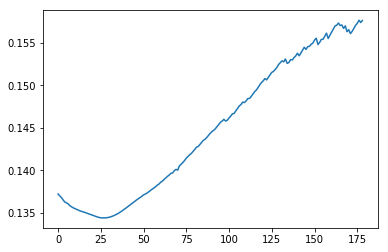

In [19]:
stddev = []
for x in new_list:
    stddev.append( np.nanstd(x) )
stddev = np.array( stddev )
plt.plot(stddev)
print("Original std: {} \nAverage  std: {}".format( stddev[0] , np.mean(stddev) ) )

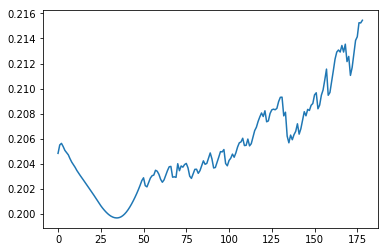

In [20]:
mean = []
for x in new_list:
    mean.append( np.mean(x) )
mean = np.array( mean )
plt.plot(mean)

In [21]:
thresh = .98
lsh_list = []
master_hash = []
for reduced in new_list:
    hashes = []
    for i in reduced:
        hashes.append( compute_minhash( i ) )
    
    lsh = MinHashLSH(threshold=thresh)
    for i, j in enumerate(hashes):
        lsh.insert("{}".format(i), j )
    lsh_list.append(lsh)
    master_hash.append(hashes)
    thresh -= .001

In [22]:
list_t = lsh_list[0].query(master_hash[0][29])
print(list_t)
same = 0
print(lsh_list[3].query(master_hash[3][29]))
for i in range(len(lsh_list)):
    list_q = lsh_list[i].query(master_hash[i][29])
    if np.equal( list_t, list_q ) is True:
        same += 1
    else:
        print( "Intersection: {} \nAdded Values: {}".format( np.intersect1d( list_t, list_q ), np.setdiff1d( list_q, list_t ) ) )
print("Amount of Correct Returns: {}".format(same))

['29', '32', '26']
['27', '29', '32']
Intersection: ['26' '29' '32'] 
Added Values: []
Intersection: ['29' '32'] 
Added Values: ['27']
Intersection: ['29'] 
Added Values: []
Intersection: ['29' '32'] 
Added Values: ['27']
Intersection: ['26' '29' '32'] 
Added Values: []
Intersection: ['29'] 
Added Values: ['27']
Intersection: ['29'] 
Added Values: []
Intersection: ['26' '29'] 
Added Values: ['25' '27']
Intersection: ['29'] 
Added Values: []
Intersection: ['29'] 
Added Values: []
Intersection: ['29'] 
Added Values: []
Intersection: ['29'] 
Added Values: []
Intersection: ['29'] 
Added Values: []
Intersection: ['26' '29'] 
Added Values: []
Intersection: ['29'] 
Added Values: []
Intersection: ['29'] 
Added Values: []
Intersection: ['29'] 
Added Values: []
Intersection: ['29'] 
Added Values: []
Intersection: ['29'] 
Added Values: []
Intersection: ['29'] 
Added Values: []
Intersection: ['26' '29'] 
Added Values: ['25' '27' '30']
Intersection: ['29'] 
Added Values: []
Intersection: ['29'] 
Ad

/home/cole/miniconda3/envs/pokemon/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys



Intersection: ['26' '29' '32'] 
Added Values: ['25' '27' '28' '30' '31']
Intersection: ['26' '29' '32'] 
Added Values: ['24' '25' '28' '30']
Intersection: ['29' '32'] 
Added Values: ['24' '27' '28']
Intersection: ['26' '29' '32'] 
Added Values: ['24' '25' '27' '28' '30' '31']
Intersection: ['26' '29' '32'] 
Added Values: ['24' '25' '27' '28' '30' '31']
Intersection: ['26' '29' '32'] 
Added Values: ['24' '25' '27' '28' '30' '31']
Intersection: ['26' '29' '32'] 
Added Values: ['25' '27' '28' '30']
Intersection: ['26' '29' '32'] 
Added Values: ['25' '27' '28' '30' '31']
Intersection: ['26' '29' '32'] 
Added Values: ['24' '25' '27' '28' '30' '31']
Intersection: ['26' '29' '32'] 
Added Values: ['25' '27' '30' '31']
Intersection: ['26' '29' '32'] 
Added Values: ['23' '24' '25' '27' '28' '30' '31' '57' '60' '75' '76']
Intersection: ['26' '29' '32'] 
Added Values: ['24' '25' '27' '28' '30' '31']
Intersection: ['26' '29' '32'] 
Added Values: ['24' '25' '27' '28' '30' '31']
Intersection: ['26' 

In [23]:
og_hashes = []
for observation in new_list[0]:
    og_hashes.append( compute_minhash( observation ) )

    lsh = MinHashLSH(threshold=0.98)
    for i, j in enumerate(og_hashes):
        lsh.insert("{}".format(i), j )
        
for hash_t in og_hashes:
    temp = lsh.query( hash_t )
    if len(temp) > 1:
        print(temp)

['22', '58']
['23', '76']
['29', '32', '26']
['29', '32', '26']
['31', '30']
['31', '30']
['29', '32', '26']
['22', '58']
['23', '76']


In [24]:
print(og_hashes[22].jaccard(og_hashes[58]))
print(og_hashes[23].jaccard(og_hashes[76]))
print(og_hashes[26].jaccard(og_hashes[32]))
print(og_hashes[26].jaccard(og_hashes[29]))
print(og_hashes[29].jaccard(og_hashes[32]))
print(og_hashes[30].jaccard(og_hashes[31]))

0.9609375
0.9765625
0.984375
0.984375
1.0
0.9765625


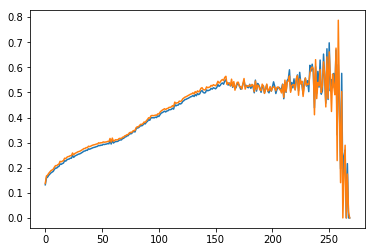

In [25]:
plt.plot(new_list[0][29])
plt.plot(new_list[0][32])

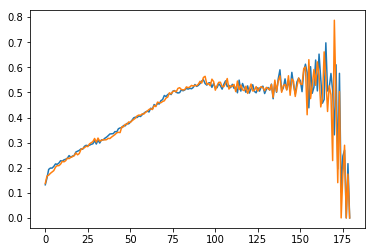

In [26]:
plt.plot(new_list[89][29])
plt.plot(new_list[89][32])

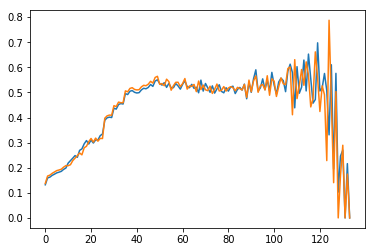

In [27]:
plt.plot(new_list[135][29])
plt.plot(new_list[135][32])

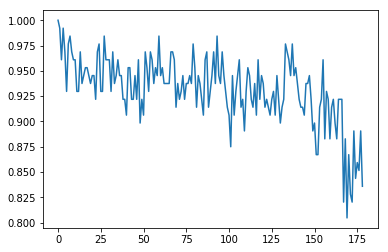

In [28]:
graph_jaccard = []
for i in range( len(master_hash) ):
    graph_jaccard.append(master_hash[i][29].jaccard(master_hash[i][32]))
plt.plot(graph_jaccard)

/home/cole/miniconda3/envs/pokemon/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/cole/miniconda3/envs/pokemon/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


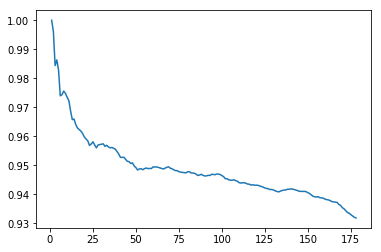

In [29]:
graph_mean = []
for i in range(0, len(master_hash)):
    graph_mean.append(np.mean(graph_jaccard[0:i]))
plt.plot(graph_mean)

In [30]:
stop

NameError: name 'stop' is not defined

In [ ]:
reduced_hashes = []
for i in reduced_plots:
    reduced_hashes.append( compute_minhash( i ) )

In [ ]:
hash_query_index = 13
# Create weighted MinHash LSH index
r_lsh = MinHashLSH(threshold=0.95, num_perm=128, prepickle=False)
for i, j in enumerate(reduced_hashes):
    r_lsh.insert("{}".format(i), j)
result = r_lsh.query(reduced_hashes[hash_query_index])
print("Approximate neighbours with weighted Jaccard similarity > 0.98", result)


In [ ]:
# newthing = []
# for hash_query_index in range(0, 83):
#     r = r_lsh.query(reduced_hashes[hash_query_index])
#     o = o_lsh.query(original_hashes[hash_query_index])
#     if len(o) > 0:
#         newthing.append( (hash_query_index, r, o) )
# print(newthing)

In [ ]:
original_hashes = []
for i in original_plots:
    original_hashes.append( compute_minhash( i ) )

In [ ]:
# Create weighted MinHash LSH index
o_lsh = MinHashLSH(threshold=0.95, num_perm=128, prepickle=False)
for i, j in enumerate(original_hashes):
    o_lsh.insert("{}".format(i), j)
result = o_lsh.query(original_hashes[hash_query_index])
print("Approximate neighbours with weighted Jaccard similarity > 0.98", result)

In [ ]:
jih = jaccard_similarity_hash(reduced_hashes[13], reduced_hashes[52])
jd = reduced_hashes[13].jaccard(reduced_hashes[52])
ojih = jaccard_similarity_hash(original_hashes[13], original_hashes[52])
ojd = original_hashes[13].jaccard(original_hashes[52])
print( jih, jd)
print( ojih, ojd)

In [ ]:
print(reduced_hashes[13].jaccard(reduced_hashes[0]))
print(original_hashes[13].jaccard(original_hashes[0]))
print(reduced_hashes[13].jaccard(reduced_hashes[52]))
print(original_hashes[13].jaccard(original_hashes[52]))



In [ ]:
original_plots[13].plot()
original_plots[52].plot()

In [ ]:
plt.plot(reduced_plots[13])
plt.plot(reduced_plots[52])


In [ ]:
plt.plot(original_plots[13])
plt.plot(reduced_plots[13])

In [ ]:
plt.plot(original_plots[52])
plt.plot(reduced_plots[52])


In [ ]:
plt.plot(original_plots[0])
plt.plot(reduced_plots[0])

In [ ]:
plt.plot(reduced_plots[13])
plt.plot(reduced_plots[0])

In [ ]:
plt.plot(original_plots[13])
plt.plot(original_plots[0])